# Fundamentals

**Note:**
> The author is not at all an expert in numerical analysis, and perhaps because of this he has not been able to find any similar algorithm in the literature.  Nevertheless, the described algorithm works, as shown by the various tests included here. If you do know a similar algorithm, please communicate this to the author.

 ## Introduction

Consider the problem of finding all real roots of a polynomial as
$$p(x) = x^4 - 3 x^3 - 21 x^2 + 43 x + 60$$
This is a fundamental problem in mathematics, and has been studied since the third millenium B.C. <cite data-cite="336701/MIW42KL9"></cite>. 

As <cite data-cite="336701/XFQXXT7W"></cite> says, "The first, and in many cases the most expensive, step in most methods for computing the real roots of a polynomial is to isolate them. That is, to compute a set of disjoint
intervals containing them (exactly one root on each interval and all roots contained in disjoint intervals)".  After root isolation, any bracketing method<cite data-cite="336701/XGYD5TB9"></cite> can be applied to aproximate the roots with arbitrary precision. Descartes (1637), Lagrange(1798), Budan (1800), Fourier (1820), Sturm (1829) gave important contributions to the area. Even with such heavy weight precursors, polynomial real root isolation is, until today, an active area of research, and very efficient methods have been proposed (see, for instance, <cite data-cite="336701/I4VDBIQD"></cite>).

Here we propose a new method which is much simpler than all algorithms we have seen. The central idea is to  define isolating intervals from the roots of the derivative of the polynomial. Roots of the derivative are found applying recursively the algorithm; recursion finishes when we arrive at a first degree polynomial. A pseudo code for the main function of the algorithm is as simple as this:

```python
# pseudo code
def find_real_roots(p):
    if degree(p) == 1:
        return "-b/a" # for a first degree polynomial written as p(x) = ax + b
    else:
        return roots_from_derivative_roots(find_real_roots(p.diff()))
        # p.diff() is the derivative of polynomial p
```

Remark the recursive call on this function. Root isolation is done by function roots_from_derivative_roots.



## Root isolation
Root isolation from roots of derivative is based on the following theorem, which is a direct application of the Mean Value Theorem<cite data-cite="336701/KP26TM8C"></cite>:


> If $r$ and $s$, $r < s$, are real roots of a polynomial $p$, there exists at least one point $v$, $r < v < s$ such that $p'(v) = 0$


If $p'$ has at least one root, let $v_0 < v_1 < \ldots < v_d$ where $d \geq 0$ denote all $d+1$ distinct real roots of $p'$. The algorithm considers the following intervals, which are disjoint and cover the hole real line. For each of these intervals  with simple tests we can decide if the interval contains zero or one root of the polynomial. None of these intervals can contain more than one root.

Case I. Interval $(-\infty, v_0]$. Here, 

- if $p(v_0) = 0$: the interval contains one root, $v_0$

- if $p(-\infty)$ and $p(v_0)$ have equal signs,  we have no roots

- if $p(-\infty)$ and $p(v_0)$ have opposite signs,  we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x < v_0$ such that $p(x)$ and $p(v_0)$ have opposite signs

Case II. Interval $(v_i, v_{i+1}]$ for $0 \leq i < d$. In those intervals,
- if $p(v_i) = 0$, we have no roots (since $v_i$ do not belong to this interval)
- if $p(v_{i+1}) = 0$, $v_{i+1}$ is the only root
- if $p(v_i)$ and $p(v_{i+1})$ have equal signs, we have no roots
- if $p(v_i)$ and $p(v_{i+1})$ have opposite signs, we have exactly one root. A bracketing algorithm may be directly applied.

Case III. Interval $(v_d, \infty)$. Here,
- if $p(v_d) = 0$, we have no roots (since $v_d$ do not belong to this interval)
- if $p(v_d)$ and $p(\infty)$ have equal signs, we have no roots
- if $p(v_d)$ and $p(\infty)$ have opposite signs, we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x > v_d$ such that $p(x)$ and $p(v_d)$ have opposite signs.

If derivative $p'$ has no roots, we shall consider the following disjoint intervals. We take 0 as a reference, but any other point would do. 

Case IV. Interval $(-\infty, 0]$. Here, 
- if $p(0) = 0$,  $0$ is the only root
- if $p(-\infty)$ and $p(0)$ have equal signs,  we have no roots
- if $p(-\infty)$ and $p(0)$ have opposite signs,  we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x < 0$ such that $p(x)$ and $p(0)$ have opposite signs
    
Case V. Interval  $(0, \infty)$. Here,
- if $p(0) = 0$, we have no roots (since $0$ do not belong to this interval)
- if $p(0)$ and $p(\infty)$ have equal signs, we have no roots
- if $p(0)$ and $p(\infty)$ have opposite signs, we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x > 0$ such that $p(x)$ and $p(0)$ have opposite signs.
    
The algorithm we propose deals with each of these cases. When it is known that an interval like $(-\infty, v_0]$ contains a root $r < v_0$, the algorithm will look for a point $x$ such that $p(x)$ and $p(v_0)$ have opposite signs, walking towards $-\infty$ with increasingly larger steps. Similar actions are taken in order to deal with all other infinite intervals.



### Examples
In all examples bellow, $v_0$ is the smallest root of derivative, $v_1$ the second smallest root of derivative, and so on. 

In [1]:
import mpmath
from mpmath import mp, mpf, nstr, findroot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sympy import init_session
    # We use sympy just to facilitate the construction of examples and to pretty print polynomials
init_session()

IPython console for SymPy 1.3 (Python 3.7.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [108]:
def plot_p(p, xlim):
    """
    Plots a polynomial
    """
    v = np.linspace(xlim[0], xlim[1], 200)
    #print(f'v = {v}')
    func_p = lambdify(x, p, 'numpy')
    
    ax = plt.gca()
    y_p = func_p(v)
    plt.gcf().text(0.02, -0.1, '$' + latex(p) + '$', fontsize=11)
    

    ax.plot(v, y_p, 'b')

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    plt.show()

In [150]:
def plot_p_pdiff(p, xlim, textstr=""):
    """
    Plots a polynomial and its derivative
    """
    v = np.linspace(xlim[0], xlim[1], 200)
    #print(f'v = {v}')
    func_p = lambdify(x, p, 'numpy')
    pdiff = p.diff()
    func_pdiff = lambdify(x, pdiff, 'numpy')
    
    ax = plt.gca()
    y_p = func_p(v)
    plt.gcf().text(0.02, -0.25, textstr, fontsize=11)
    
    y_pdiff = func_pdiff(v)
    ax.plot(v, y_p, 'b', label='$' + latex(p) + '$')
    ax.plot(v, y_pdiff, 'r', label='$' + latex(pdiff) + '$')
    ax.legend()
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    plt.show()

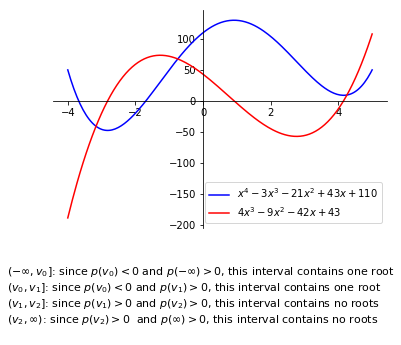

In [151]:
textstr = '''
$(-\infty, v_0]$: since $p(v_0) < 0$ and $p(-\infty) > 0$, this interval contains one root
$(v_0, v_1]$: since $p(v_0) < 0$ and $p(v_1) > 0$, this interval contains one root
$(v_1, v_2]$: since $p(v_1) > 0$ and $p(v_2)  > 0$, this interval contains no roots
$(v_2, \infty)$: since $p(v_2) > 0$  and $p(\infty) > 0$, this interval contains no roots
'''

p = ((x + 4)*(x + 1)*(x - 3)*(x - 5) + 50).expand()
p_diff = p.diff()

plot_p_pdiff(p, (-4, 5), textstr)

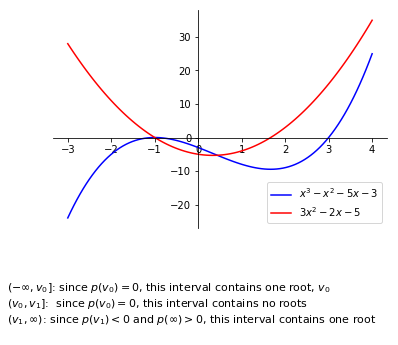

In [4]:
p = ((x + 1)**2 * (x - 3)).expand()
p_diff = p.diff()

textstr = '''
$(-\infty, v_0]$: since $p(v_0) = 0$, this interval contains one root, $v_0$
$(v_0, v_1]$:  since $p(v_0) = 0$, this interval contains no roots
$(v_1, \infty)$: since $p(v_1) < 0$ and $p(\infty) > 0$, this interval contains one root
'''

plot_p_pdiff(p, (-3,4), textstr)

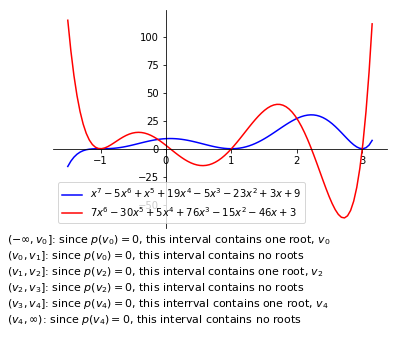

In [5]:
textstr = '''
$(-\infty, v_0]$: since $p(v_0) = 0$, this interval contains one root, $v_0$
$(v_0, v_1]$: since $p(v_0) = 0$, this interval contains no roots
$(v_1, v_2]$: since $p(v_2) = 0$, this interval contains one root, $v_2$
$(v_2, v_3]$: since $p(v_2) = 0$, this interval contains no roots
$(v_3, v_4]$: since $p(v_4) = 0$, this interrval contains one root, $v_4$
$(v_4, \infty)$: since $p(v_4) = 0$, this interval contains no roots
'''

p = ((x+1)**3 * (x - 1)**2 * (x - 3)**2).expand()
p_diff = p.diff()

plot_p_pdiff(p, (-1.5, 3.15), textstr)

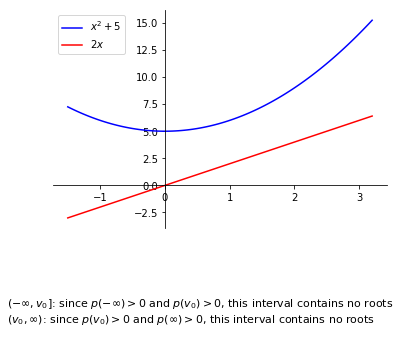

In [6]:
textstr = '''
$(-\infty, v_0]$: since $p(-\infty) > 0$ and $p(v_0) > 0$, this interval contains no roots
$(v_0, \infty)$: since $p(v_0) > 0$ and $p(\infty) > 0$, this interval contains no roots
'''
p = (x**2 + 5).expand()
pdiff = p.diff()

plot_p_pdiff(p, [-1.5, 3.2], textstr)

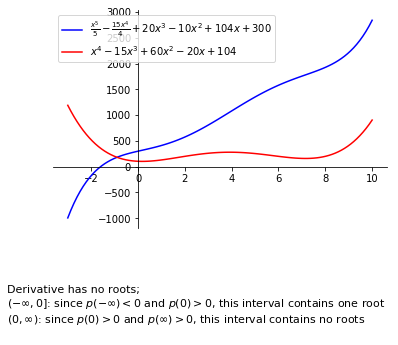

In [8]:
textstr = '''
Derivative has no roots;
$(-\infty, 0]$: since $p(-\infty) < 0$ and $p(0) > 0$, this interval contains one root
$(0, \infty)$: since $p(0) > 0$ and $p(\infty) > 0$, this interval contains no roots
'''

p_diff = ((x + 4)*(x + 1)*(x - 3)*(x - 5) + 200).expand().subs(x, x-3)
p = integrate(p_diff, x) + 300

plot_p_pdiff(p, (-3, 10), textstr)

# Code
Notes:
- We use mpmath to get arbitrary precision numbers.
- Global variables are used to control verbosity
- Sympy polynomials and some associated functions are used for the sake of clarity.

In [148]:
def mp_roots(p, tolerance, solver):
    """
    Returns a list of all real roots of (sympy) polynomial p.
    
    Parameters
    ----------
    p : sympy polynomial
    tolerance : mpmath mpf number
        A number x is considered a root of p if abs(p(x)) < tolerance
    solver : function
        A root-finding function such as bisection, newton, brent or hibrid
    ----------
    
    """
    
    global verbose_main_loop
    
    todo = [] # to do stack
    
    while degree(p) > 1: # push derivatives
        todo.append(p)
        p = diff(p)
        
    # p is a first degree polynomial
    cfs = Poly(p).all_coeffs()
    roots = [-mpf(cfs[1]) / mpf(cfs[0])]
    
    if verbose_main_loop:
        print(f'\nSolving {p}')
    
    pdiff = p
    func_pdiff = lambdify(x, pdiff, 'mpmath')
    
    while len(todo) > 0: # pop derivatives
        derivative_roots = roots
        p = todo.pop()
        if verbose_main_loop:
            print(f'\nSolving {p}')
        p_as_function = lambdify(x, p, 'mpmath')
        roots = real_roots_from_derivative_roots(p, p_as_function, func_pdiff, 
                                                 derivative_roots, tolerance, solver)
        func_pdiff = p_as_function
    
    return roots

In [10]:
def real_roots_from_derivative_roots(p, p_as_function, func_pdiff, derivative_roots, tolerance, solver):
    """
    This function finds the real roots of polynomial p, using the roots of the derivative of p
    
    Parameters
    ----------
    p : sympy polynomial
    p_as_function : function
        Calculates p(x)
    func_pdiff : function
        Calculates p'(x), where p' is the derivative of p. Used by solvers like newton or hibrid
    derivative_roots : list
        List of all roots of p'. Must be in ascending order
    tolerance : mpmath mpf number
        A number x is considered a root of p if abs(p(x)) < tolerance
    solver : function
        A bracketing root-finding function such as bisection    
    ----------
    """
    
    
    n_derivative_roots = len(derivative_roots)
    
    roots = []
    
    #print(f'rrfdr: derivative_roots = {derivative_roots}, {type(derivative_roots)}----\n')
    if n_derivative_roots == 0:
        # I took 0, but any point should work
        left_extremity = mpf(0)
        right_extremity = mpf(0)
    else:
        left_extremity = derivative_roots[0]
        right_extremity = derivative_roots[-1]
    #print(f'left_extremity = {left_extremity}, {type(left_extremity)}')
    #print(f'right_extremity = {right_extremity}, {type(right_extremity)}')
    
    right_limit_sign = sign(LC(p)) # LC: Leading Coefficient
    
    if degree(p) % 2 == 0:
        left_limit_sign = sign(LC(p))
    else:
        left_limit_sign = -sign(LC(p)) 
    
    roots = roots + external_root(p, p_as_function, func_pdiff, left_extremity, left_limit_sign, mpf(-1), tolerance, solver)
    #print(f'After left external root, roots = {roots}')
    
    for i in range(n_derivative_roots - 1): 

        roots = roots + internal_root(p, p_as_function, func_pdiff, derivative_roots[i], derivative_roots[i+1], tolerance, solver)
        #print(f'After internal root, roots = {roots}')
        
    roots = roots + external_root(p, p_as_function, func_pdiff, right_extremity, right_limit_sign, mpf(1), tolerance, solver)
    #print(f'After right external root, roots = {roots}')
    
    return roots

In [11]:
def external_root(p, p_as_function, func_pdiff, extremity, limit_sign, initial_step, tolerance, solver):
    """
    Look for a root in intervals where one of its limits is -infinity or infinity
    
    Parameters
    ----------
    p : sympy polynomial
    p_as_function : function
        Calculates p(x)
    func_pdiff : function
        Calculates p'(x), where p' is the derivative of p. Used by solvers like newton or hibrid
    extremity : number
        Interval is either (-infinity, extremity] or (extremity, infinity), depending on initial_step
    limit_sign : number sign
        Sign of polynomial at -infinity or at infinity, depending on initial_step
    initial_step :
        number
        initial_step must be a nonzero value; normally, initial_step == mpf(1). 
        If initial_step < 0, the function will start by looking for a bracketing
        interval testing values from extremity towards -infinity.
        If initial_step > 0, the function will start by looking for a bracketing
        interval testing values from extremity towards infinity.
    tolerance : mpmath mpf number
        A number x is considered a root of p if abs(p(x)) < tolerance
    solver : function
        A bracketing root-finding function such as bisection 
    ----------
    """
    global verbose_solver
    
    #print(f'external_root: extremity = {extremity}')
    value_at_extremity = p_as_function(extremity)
    
    if abs(value_at_extremity) <= tolerance:
        if initial_step < 0:
            root_found = [extremity]
        else:
            root_found = []
    else:
    
        sign_at_extremity = sign(value_at_extremity)

        if limit_sign == sign_at_extremity:
            root_found = []
        else:

            if initial_step > 0:
                a = extremity
                b = point_with_sign_inversion(p_as_function, extremity, sign_at_extremity, initial_step)
            else:
                a = point_with_sign_inversion(p_as_function, extremity, sign_at_extremity, initial_step)
                b = extremity
            #print(f'left_external_root: calling findroot for {p}')
            #print(f'a = {a}, left_extremity = {left_extremity}')
            #root_found = [findroot(p_as_function, [a, b], solver='anderson', tol=tolerance,
            #                      maxsteps=MAXSTEPS)]
        #    root_found = [bisection(p, p_as_function, a, b, tolerance)]
            if verbose_solver:
                print(f'external_root: calling solver for p = {p}')
            root_found = [solver(a, b, tolerance, p_as_function, func_pdiff)]
        
    #print(f'{p}: {root_found} added by external_root')
    return root_found

In [12]:
def point_with_sign_inversion(p_as_function, extremity, sign_at_extremity, initial_step):
    """
    Finds a bracketing interval starting from an interval with one of its limits equal to infinity or -infinity
    
    Parameters
    ----------
    p_as_function : function
        Calculates p(x)
    extremity : number
        Interval is either (-infinity, extremity] or (extremity, infinity), 
        and extremity is either the smallest or the greatest root of derivative, depending on initial_step.  
    sign_at_extremity : number sign
        Sign of p(extremity)
    initial_step :
        number
        initial_step must be a nonzero value; normally, initial_step == mpf(1). 
        If initial_step < 0, the function will start by looking for a bracketing
        interval testing values from extremity towards -infinity.
        If initial_step > 0, the function will start by looking for a bracketing
        interval testing values from extremity towards infinity.    
    ----------
    """

    #print(f'Looking for {p} sign inversion from x = {extremity} with initial step = {initial_step}')
    step = initial_step
    x = extremity + step
    p_x = p_as_function(x)
    sign_at_x = sign(p_x)
    
    while sign_at_x == sign_at_extremity:
        step = 2*step # Double step length
        x = x + step
        p_x = p_as_function(x)
        #print(f'x = {x}, p_x = {p_x}, step = {step}')
        sign_at_x = sign(p_x)
        
    return x

In [45]:
def internal_root(p, p_as_function, func_pdiff, a, b, tolerance, solver):
    """
    Looks for a root in intervals where both limits are finite numbers
    
    Parameters
    ----------
    p : sympy polynomial
    p_as_function : function
        Calculates p(x)
    func_pdiff : function
        Calculates p'(x), where p' is the derivative of p. Used by solvers like newton or hibrid 
    a : number
        Left limit of interval
    b : number
        Right limit of interval
    tolerance : mpmath mpf number
        A number x is considered a root of p if abs(p(x)) < tolerance
    solver : function
        A bracketing root-finding function such as bisection         
    ----------
    """
    global verbose_solver
    #print(f'Approximating root of {p}, {a} <= root <= {b}')
    p_a = p_as_function(a)
    #print(f'internal_root: p_a = {p_a}')
    if abs(p_a) <= tolerance:
        root_found = []
    else:
        p_b = p_as_function(b)
        if abs(p_b) < tolerance:
            root_found = [b]
        else:
            sign_at_a = sign(p_a)
            sign_at_b = sign(p_b)
            if sign_at_a == sign_at_b:
                root_found = []
            else:
                if verbose_solver:
                    print(f'internal_root: calling solver for p = {p}')
                root_found = [solver(a, b, tolerance, p_as_function, func_pdiff)]
    #print(f'{p}: {root_found} added by internal_root')
    return root_found

In [256]:
def bisection(a, b, tolerance, p_as_function, func_pdiff):

    global verbose_solver
    if verbose_solver:
        print('bisection: starting')

    p_a = p_as_function(a)
    p_b = p_as_function(b)
    m = (a + b) / 2
    p_m = p_as_function(m)
    progress = True
    
    iter = 0
    while abs(p_m) > tolerance and progress:
        iter += 1
        old_a, old_b = a, b
        if p_a * p_m <= 0:
            b = m
            p_b = p_m
        else:
            if p_b * p_m <= 0:
                a = m
                p_a = p_m
        m = (a + b) / 2
        p_m = p_as_function(m)
        if old_a == a and old_b == b:
            progress = False
            raise ValueError(f'bissection: no progress after {iter} iterations, with \na = {a} \nb = {b}')
    if verbose_solver:
        print(f'bisection: finishing after {iter} iterations')
    return m

In [259]:
# Testing bisection
global verbose_solver
verbose_solver = True
mp.dps = 50

p = ((x-1)*(x-mpmath.sqrt(2))*(x-3)).expand()
print(f'p = {p}')
pdiff = p.diff()

p_as_function = lambdify(x, p, 'mpmath')
func_pdiff = lambdify(x, pdiff, 'mpmath')
r = bisection(mpf(1.1), mpf(2.0), mpf('1.0e-30'), p_as_function, func_pdiff)
print(r, r*r)

p = x**3 - 5.4142135623730950488016887242096980785696718753769*x**2 + 8.6568542494923801952067548968387923142786875015078*x - 4.2426406871192851464050661726290942357090156261308
bisection: starting
bisection: finishing after 97 iterations
1.4142135623730950488016887242105194110828816440373 2.0000000000000000000000000000023230791587984681689


In [ ]:
def mpmath_solver ( a, b, tol, f, func_pdiff):
    global verbose_solver
    if verbose_solver:
        print(f'mpmath_solver: calling mpmath.findroot')
    return findroot(f, (a + b)/mpf(2), solver='anewton', tol = tol, maxsteps = 10000)

In [303]:
def hibrid( a, b, tolerance, f, fdiff):
    """
    Solver that mixes Newton-Raphson and Bisection methods.
    Adapted from https://doi.org/10.12988/ams.2017.710302   
    """
    
    global verbose_solver
    if verbose_solver:
        print('hibrid: starting')
        
    iter = 0
    f_a = f(a)
    f_b = f(b)
    if f_a * f_b > 0:
        raise ValueError(f'f(a) and f(b) must have opposite signs')
    n_bisec = 0
    n_newton = 0
    m = (a + b)/2
    f_m = f(m)
    
    while abs(f_m) > tolerance:
        old_a, old_b = a, b
        # print(f'a = {a}\nb = {b}\nm={m}')
        iter += 1
        f_m = f(m)
        fdiff_m = fdiff(m)
        next_x_newton = m - f_m / fdiff_m
        
        if (a < next_x_newton < b): # and (iter % 10 != 0):
            # Take newton guess
            m = next_x_newton
            n_newton += 1
        else:
            # Take bisection guess
            m = (a + b)/2
            n_bisec += 1           
        f_m = f(m)
        if f_a * f_m <= 0:
            b = m
            f_b = f_m
        if f_b * f_m <= 0:
            a = m
            f_a = f_m
        if a == old_a and b == old_b:
            raise ValueError(f'hibrid: no progress after {iter} iterations, '
                             f'with \na = {a}\nb = {b}\nm={m} \nb - a = {b - a}'
                             f'\nold_a = {old_a}\nold_b = {old_b}')
            break
    if verbose_solver:
        print(f'hibrid: finishing after {iter} iterations,'
              f' n_newton = {n_newton}, n_bisec = {n_bisec}')
        print(f'root found: {m}')
        print(f'abs(f_m) = {abs(f_m)}')
    return m
        
    

In [255]:
# Testing hibrid
global verbose_solver
verbose_solver = True
mp.dps = 800
p = ((x-1) * (x-2)**3 * (x-3)).expand()
func_p = lambdify(x, p, 'mpmath')
pdiff = p.diff()
func_pdiff = lambdify(x, pdiff, 'mpmath')

hibrid(mpf(1.1), mpf(2.5), mpf('1.0e-400'), func_p, func_pdiff)

hibrid: starting
hibrid: finishing after 754 iterations, n_newton = 754, n_bisec = 0


mpf('1.9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999670846202267260327688953076598305821051946334314907387112831806606846709292209445683779038220939872779048522608194639990470129216316055014958996759133774986055555109050150975758956979711853546257918946317720004739693256076676179858297713253555535711937811650228859289403387241692575302855561777746546510799775608283177814496999903122548595380218728641219330661638082169727932310663536450808421716762866895938262561102136493911354048721255072149213831913788466424450348699231651378265413411452484337770065610844066576176191482748192424677193358720318595073509150897618460160115293561508584313711459921568777660872974119649769214509772821403901432805416826517401802316524')

In [40]:
def newton(a, b, tolerance, f, fdiff, maxiter=2000):
    #convergence not guaranteed
    global verbose_solver
    if verbose_solver:
        print('newton: starting...')
    iter = 0
    x_newton = (a + b)/2
    while abs(f(x_newton)) > tolerance:
        iter += 1
        if iter >= maxiter:
            raise ValueError(f'newton: no convergence after {iter} iterations')
            break
        x_newton = x_newton - f(x_newton)/fdiff(x_newton)
    if verbose_solver:
        print(f'newton: ending after {iter} iterations')
    return x_newton

In [222]:
# Testing newton
global verbose_solver
mp.dps = 40
p = ((x-1) * (x-2)**10 * (x-3)).expand()
func_p = lambdify(x, p, 'mpmath')
pdiff = p.diff()
func_pdiff = lambdify(x, pdiff, 'mpmath')
verbose_solver = True
newton(mpf(1.1), mpf(2.5), mpf(1.0e-20), func_p, func_pdiff)

newton: starting...
newton: ending after 29 iterations


mpf('1.990624636514708775895562498996600726322196')

# Tests
For the construction of tests, sympy is a fundamental tool.

## Check roots

In [177]:
def sign_at_minus_inf(p):
    #print(f'sign_at_minus_inf: p = {p}')
    if degree(p) % 2 == 0:
        s = sign(LC(p, x))
    else:
        s = sign(-LC(p, x))
    #print(f's = {s}')
    return s
    
def sign_at_plus_inf(p):
    #print(f'sign_at_plus_inf: p = {p}')
    s = sign(LC(p, x))
    #print(f's = {s}')
    return s

In [173]:
def Sturm(p):
    """
    Returns total number of distinct real roots of p, based on Sturm's theorem
    https://en.wikipedia.org/wiki/Sturm%27s_theorem
    """
    minus_inf_sign_inversions = 0
    plus_inf_sign_inversions = 0
    
    last_p = p.diff()

    if sign_at_minus_inf(p) != sign_at_minus_inf(last_p):
        minus_inf_sign_inversions += 1
    if sign_at_plus_inf(p) != sign_at_plus_inf(last_p):
        plus_inf_sign_inversions += 1
        
    last_sign_at_minus_inf = sign_at_minus_inf(last_p)
    last_sign_at_plus_inf = sign_at_plus_inf(last_p)

    while degree(last_p) > 0:
        next_p = -rem(p, last_p)
        #print(f'p = {p}, last_p = {last_p}, next_p = {next_p}')
        if sign_at_minus_inf(next_p) != last_sign_at_minus_inf:
            minus_inf_sign_inversions += 1
        if sign_at_plus_inf(next_p) != last_sign_at_plus_inf:
            plus_inf_sign_inversions += 1
        p = last_p
        last_p = next_p
        last_sign_at_minus_inf = sign_at_minus_inf(last_p)
        last_sign_at_plus_inf = sign_at_plus_inf(last_p)        
        
    return minus_inf_sign_inversions - plus_inf_sign_inversions

In [299]:
def check_roots(p, roots, tolerance):
    
    # Are all elements of roots distinct and in ascending order?
    for i in range(len(roots) - 1):
        if roots[i] >= roots[i + 1]:
            raise ValueError(f'roots[{i}] is >= roots[{i + 1}]')
    print(f'\ncheck_roots: all roots are distinct and in order')
    # For all r in roots, abs(p(r)) <= tolerance?
    p_as_function = lambdify(x, p, 'mpmath')
    for r in roots:
        abs_p_r = abs(p_as_function(r))
        if abs_p_r > tolerance:
            raise ValueError(f'abs(p({r})) = {abs_p_r} > {tolerance}')
    print(f'check_roots: all roots are roots within tolerance')
    # Number of elements of roots equals Sturm(p)?
    n_roots_Sturm = Sturm(p)
    if len(roots) != n_roots_Sturm:
        raise ValueError(f"We have {len(roots)} roots;"
                         f"{n_roots_Sturm} were expected by Sturm's theorem.")
    print(f"check_roots: number of roots, {n_roots_Sturm},"
          " as expected by Sturm's theorem")

In [261]:
def print_roots(p, roots):
    print(f'\nReal roots of p(x) =\n{p}')
    for i, r in enumerate(roots):
        print(f'Root[{i}] = \n{r}')

## Choose your roots

In [171]:
def poly_from_roots(poly_roots, constant=Rational(1)):
    """
    Constructs a polynomial from a list of is roots. 
    If a complex number is included in list, its conjugate will be included too.
    """
    x = Symbol('x')
    W = constant
    for r in poly_roots:
        if isinstance(r, complex):
            a = Rational(r.real)
            b = Rational(r.imag)
            W = W * (a**2 - 2*a*x + b**2 + x**2)
        else:
            W = W * (x - Rational(r))
    return W.expand()

In [297]:
global verbose_solver, verbose_main_loop
mp.dps = 40 # number of digits
tolerance = mp.mpf('1.0e-15')
solver = hibrid
verbose_solver = False
verbose_main_loop = False

p = poly_from_roots([3, 2, -5, 4 + 2j, 15])

roots = mp_roots(p, tolerance, solver)

# try to uncomment one or more of these lines
# bug roots[2] = roots[0]
# bug roots[2] = 2.4
# bug roots = roots[:-1]

print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
x**6 - 23*x**5 + 121*x**4 + 167*x**3 - 3350*x**2 + 9900*x - 9000
Root[0] = 
-5.000000000000000000000000501595455822748
Root[1] = 
1.999999999999999999999999999999995688763
Root[2] = 
3.000000000000000000000000000000023369982
Root[3] = 
15.00000000000000000000000000000000021189

check_roots: all roots are distinct and in order
check_roots: all roots are roots within tolerance
check_roots: number of roots, 4, as expected by Sturm's theorem


In [263]:
N_DIGITS = 40
mp.dps = N_DIGITS
tolerance = mp.mpf('1.0e-15')
solver = newton
global verbose_solver, verbose_main_loop
verbose_solver = False
verbose_main_loop = False

p = poly_from_roots([1] + [2]*3 + [4, 5]*5 + [6]*2 + [7, 8])

roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
x**18 - 79*x**17 + 2919*x**16 - 67007*x**15 + 1070489*x**14 - 12633813*x**13 + 114097765*x**12 - 805804477*x**11 + 4508665146*x**10 - 20121250256*x**9 + 71733544256*x**8 - 203613831696*x**7 + 456245326624*x**6 - 795086764672*x**5 + 1052328652800*x**4 - 1018907648000*x**3 + 678179840000*x**2 - 276172800000*x + 51609600000
Root[0] = 
0.9999999999999999999999999999996766890358
Root[1] = 
1.999999999999999999999999999998512898563
Root[2] = 
4.000000000000000000000000000001539657522
Root[3] = 
5.000000000000000000000000000069256759081
Root[4] = 
6.000000000000000000000000056398167613971
Root[5] = 
7.000000000000000000000002749774652321272
Root[6] = 
8.000000000000000000000000000000000878629

check_roots: all roots are distinct and in order
check_roots: all roots are roots within tolerance
check_roots: number of roots, 7, as expected by Sturm's theorem


In [155]:
# Just to show how numpy.roots and mpmath.polyroots both fail in this case.

p = poly_from_roots([1] + [2]*3 + [4, 5]*5 + [6]*2 + [7, 8])
coefs = Poly(p).all_coeffs()
print(np.roots(coefs))
print(mpmath.polyroots(coefs, maxsteps=500))

[7.99999839+0.j         7.00003959+0.j         6.04621223+0.j
 5.92832335+0.j         5.53076489+0.j         5.18659628+0.43163598j
 5.18659628-0.43163598j 4.70616934+0.47168465j 4.70616934-0.47168465j
 4.15697898+0.38787049j 4.15697898-0.38787049j 3.83408005+0.2476275j
 3.83408005-0.2476275j  3.72701188+0.j         2.00212984+0.j
 1.99893526+0.00182131j 1.99893526-0.00182131j 1.        +0.j        ]


NoConvergence: Didn't converge in maxsteps=500 steps.

## Wilkinson polynomials

In [156]:
def Wilkinson(n):
    return poly_from_roots(list(range(1,n+1)))

p = x**7 - 28*x**6 + 322*x**5 - 1960*x**4 + 6769*x**3 - 13132*x**2 + 13068*x - 5040
sign inversions: 7


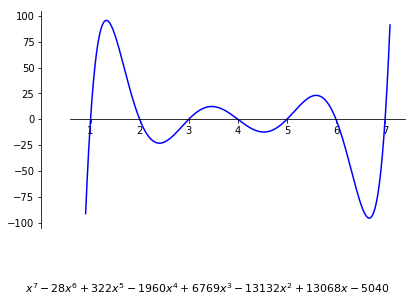

In [164]:
p = Wilkinson(7)

plot_p(p, (0.90, 7.10))

In [310]:
global verbose_main_loop, verbose_solver
mp.dps = 300
tolerance = mpf('1.0e-15')
solver = hibrid
verbose_solver = False
verbose_main_loop = False
p = Wilkinson(50)

#%prun -s cumulative mp_roots(p, tolerance, solver)

# Uncomment line above and comment lines bellow if you want time measures

roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
x**50 - 1275*x**49 + 791350*x**48 - 318622500*x**47 + 93570498490*x**46 - 21366198225750*x**45 + 3949131291964600*x**44 - 607317906105487500*x**43 + 79274383168492884295*x**42 - 8916311500907225617125*x**41 + 874274440470458637491350*x**40 - 75430949131153796097540000*x**39 + 5769557497517595816762422380*x**38 - 393625378247020213038955570500*x**37 + 24074634262098477202456261501600*x**36 - 1325513314288519699308436238355000*x**35 + 65926306456751344865378122278650335*x**34 - 2970483623265905855449410614694043125*x**33 + 121537997067927371629961551678685914850*x**32 - 4524229387507572623070958774667674282500*x**31 + 153457012425237702675940309806097247177498*x**30 - 4748411888781425210165280179331840887560950*x**29 + 134153032410638239369309397211318138160939400*x**28 - 3462458978207366446890224680162408296258877500*x**27 + 81661954970720573655661780303655361431161958585*x**26 - 1759975170237895559117007667844300114185022044875*x**25 + 3465207876504419845209509058

check_roots: all roots are roots within tolerance
check_roots: number of roots, 50, as expected by Sturm's theorem


## Mignotte polynomials

In [65]:
def Mignotte(n, tau):
    x = Symbol('x')
    return (x**n - ((2**(tau//2) - 1)*x - 1)**2).expand()

p = x**11 - 16129*x**2 + 254*x - 1
sign inversions: 3


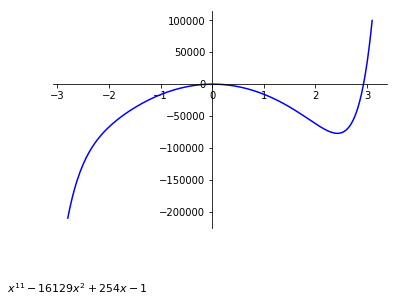

In [165]:
p = Mignotte(11, 14)

plot_p(p, (-2.8, 3.1))

In [270]:
solver = newton
verbose_solver = False
verbose_main_loop = False
mp.dps = 100
n = 11
tau = 14
p = Mignotte(n, tau)
print(f'p = {p}')

tolerance = mpf('1.0e-50')

#%prun -s cumulative mp_roots(p, tolerance, solver)

# Uncomment line above and comment lines bellow if you want time measures

roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)

p = x**11 - 16129*x**2 + 254*x - 1

Real roots of p(x) =
x**11 - 16129*x**2 + 254*x - 1
Root[0] = 
0.007874015748010347745885177169100414301856999738898600429183668811990442115613708149642596204966677218
Root[1] = 
0.007874015748052644380099699609492630286802608763568883587778986309427034769276692292318418470146594349
Root[2] = 
2.932597504867591260413736197248257937238803306869364995154576393894643530487726692606350724481769108

check_roots: all roots are distinct and in order
check_roots: all roots are roots within tolerance
check_roots: number of roots, 3, as expected by Sturm's theorem


In [314]:
solver = hibrid
verbose_solver = False
verbose_main_loop = False

n = 513
tau = 14
p = Mignotte(n, tau)

mp.dps = 1750 # number of digits in mpmath
# try mp.dps = 1000
tolerance = mpf('1.0e-1500')
# try tolerance = mpf('1.0e-150')

#%prun -s cumulative mp_roots(p, tolerance, solver)

# Uncomment line above and comment lines bellow if you want time measures

roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)

p = x**513 - 16129*x**2 + 254*x - 1

Real roots of p(x) =
x**513 - 16129*x**2 + 254*x - 1
Root[0] = 
0.007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968503937007874015748031496062992125984251968485292889406511429285447724222228392024104189585194694680181892021393552271333062542142159688999522569271044515160041009802275162597377129412543852956934870290286297974422131733299758238994611222213117738707833357694993353879687170348676165803126879910228099830464766520619910665957452237768673452774958019274182661611947829301706689207945239855212286300513

## Nested Mignotte polynomials

In [282]:
def nested_Mignotte(n, tau):
    x = symbols('x')
    p = 1
    for i in range(1, 5):
        p = p * (x**(n//4) - ((2**(tau//8) - 1)*x**2 - 1)**(2*i))
    return p.expand()

In [315]:
nested_Mignotte(4, 8)

In [316]:
solver = hibrid
verbose_solver = False
verbose_main_loop = False
mp.dps = 2000
n = 64
tau = 14
p = nested_Mignotte(n, tau)

tolerance = mpf('1.0e-500')
#%prun -s cumulative mp_roots(p, tolerance, solver)

roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
8*x**62 - 28*x**60 + 48*x**58 + 6*x**56 - 296*x**54 + 1018*x**52 - 2204*x**50 + 3431*x**48 - 3640*x**46 + 1195*x**44 + 5782*x**42 - 18474*x**40 + 35648*x**38 - 52353*x**36 + 61082*x**34 - 55275*x**32 + 31984*x**30 + 8261*x**28 - 61790*x**26 + 119594*x**24 - 166000*x**22 + 184326*x**20 - 167900*x**18 + 125966*x**16 - 77520*x**14 + 38760*x**12 - 15504*x**10 + 4845*x**8 - 1140*x**6 + 190*x**4 - 20*x**2 + 1
Root[0] = 
-0.85117093406701547892839654212806696054076915457816011364738004495864302623100603057655869910635266481456271777496481830096917400958841550093958508615931762807777416957545507336831085124331792814184666909177032697971852312671025185791258915789482319598333576397841200621262256847808433426178373048812162930857822426663197504356820788973154624143625167028898947452667724729258290396550762763956403464983430892162150240583979040397448408276547564245189334059002792394766563642610271436035169285686602656602634896678589928393782007728357052313137614019961384009

check_roots: number of roots, 8, as expected by Sturm's theorem


## Chebyshev polynomials of first kind

In [78]:
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:            
            memo[x] = f(x)
        return memo[x]
    return helper

@memoize
def Chebyshev(n):
    x = symbols('x')
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return (2*x*Chebyshev(n-1) - Chebyshev(n-2)).expand()

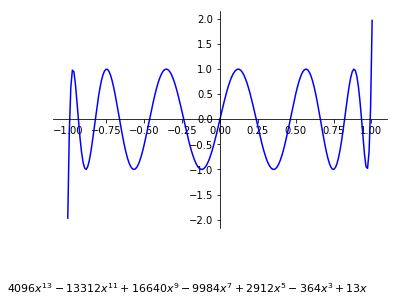

In [170]:
p = Chebyshev(13)
plot_p(p, [-1.005, 1.005])

In [317]:
n = 65
mp.dps = 800
solver = hibrid
p = Chebyshev(n)
tolerance = mpf('1.0e-50')
verbose_main_loop = False
verbose_solver = False
roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
18446744073709551616*x**65 - 299759591197780213760*x**63 + 2323136831782796656640*x**61 - 11428334414415370649600*x**59 + 40069426604640777011200*x**57 - 106584674768344466849792*x**55 + 223556839026824199536640*x**53 - 379385867215472594780160*x**51 + 530391426205841620992000*x**49 - 618789997240148557824000*x**47 + 608101806378727810007040*x**45 - 506751505315606508339200*x**43 + 359745762028296129740800*x**41 - 218188997679883747328000*x**39 + 113219921064981692416000*x**37 - 50269644952851871432704*x**35 + 19075534915144683356160*x**33 - 6171496590193868144640*x**31 + 1696067325319236812800*x**29 - 393937834141653401600*x**27 + 76817877657622413312*x**25 - 12470434684678963200*x**23 + 1667558126439628800*x**21 - 181256318091264000*x**19 + 15749405687808000*x**17 - 1070959586770944*x**15 + 55449091031040*x**13 - 2107713986560*x**11 + 55948006400*x**9 - 964620800*x**7 + 9646208*x**5 - 45760*x**3 + 65*x
Root[0] = 
-0.9997080140801929642838083404567874893379113994

check_roots: all roots are roots within tolerance
check_roots: number of roots, 65, as expected by Sturm's theorem


## Random coefficients

In [293]:
def randomPoly(n, tau):
    from random import choices
    c = np.arange(-(2**tau), 2**tau + 1)
    coefs = choices(c, k=n+1)
    p = 1
    for i in range(n+1):
        p = p + coefs[i]*x**i
    return p

In [295]:
randomPoly(4, 3)

In [318]:
n = 64
tau = 20
mp.dps = 800
solver = hibrid
p = randomPoly(n, tau)
tolerance = mpf('1.0e-50')
verbose_main_loop = False
verbose_solver = False
roots = mp_roots(p, tolerance, solver)
print_roots(p, roots)
check_roots(p, roots, tolerance)


Real roots of p(x) =
-110083*x**64 - 381592*x**63 + 466696*x**62 - 405175*x**61 - 914972*x**60 - 97198*x**59 + 1020689*x**58 + 961214*x**57 + 255042*x**56 - 778645*x**55 + 15240*x**54 + 151842*x**53 - 543588*x**52 - 881771*x**51 - 500409*x**50 - 781195*x**49 - 469882*x**48 + 709605*x**47 + 412644*x**46 - 481275*x**45 - 654216*x**44 + 34811*x**43 + 800482*x**42 + 1007482*x**41 - 897247*x**40 + 848653*x**39 - 392963*x**38 - 433837*x**37 - 46221*x**36 - 629336*x**35 + 72808*x**34 + 720148*x**33 - 690266*x**32 + 452723*x**31 - 545483*x**30 - 841571*x**29 - 856002*x**28 + 479453*x**27 - 221225*x**26 - 229526*x**25 - 567035*x**24 + 146401*x**23 - 593075*x**22 - 236683*x**21 - 185796*x**20 - 799773*x**19 - 150155*x**18 + 312427*x**17 - 131113*x**16 + 136776*x**15 - 953214*x**14 + 966439*x**13 - 1025116*x**12 - 865164*x**11 + 606589*x**10 - 781416*x**9 + 376683*x**8 + 371083*x**7 - 779921*x**6 - 400585*x**5 + 618201*x**4 + 852032*x**3 - 349061*x**2 - 132857*x - 739060
Root[0] = 
-4.5042820633

In [200]:
def horner(p):
    coeffs = Poly(p).all_coeffs()
    n = len(coeffs)
    def evaluate(x):
        result = coeffs[0]
        for i in range(1, n):
            result = result*x + coeffs[i]
        return result
    return evaluate

In [210]:
p = ((x + 1)*(x + 2)).expand()
q = ((x - 1)**4).expand()
p, q

In [211]:
p_as_function = horner(p)
q_as_function = horner(q)

In [212]:
p_as_function(3), p.subs(x, 3)

In [213]:
q_as_function(3), q.subs(x, 3)

In [320]:
mp.dps = 8000
p = Wilkinson(100)
p_lambda = lambdify(x, p, 'mpmath')
p_horner = horner(p)

In [321]:
v = mpmath.pi
p_lambda(v) - p_horner(v)

mpf('3.139625524418370760791212778461857238778283637786099433027059986302142846724663665444750467544846294269657283472050381806706356995653036757437740857663980096539003216181078838823143717713790191176692348179764084216044756713302309510320722984532900654515050601837406814879864256133021169727004912647136605074566602411916378378935207737231083798036265956938612583795510043262771554347434846394066586020576673432397246769456459498768889040699043757037944724125839549120088697496782382757923264264424795285948703775626603375838089290875749181827510349170560828088447098616122234189146146313431086064682121874598139049697232117912357261157129565970651115368963309678691781084174244490002691698293537801563071303119701082169661182173296072838039119429424012890927879610345637777162230564903958902120522593909797229246347003188319673606111249022075664152821885793288712582687118942342180948414210397871624239598075210736694459297098371381332663161069535513606714111824449575287906239823392808916449273

In [322]:
%timeit p_lambda(v)

236 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [323]:
%timeit p_horner(v)

49.8 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [324]:
p_M = Mignotte(257, 14)
p_M_lambda = lambdify(x, p_M, 'mpmath')
p_M_horner = horner(p_M)

In [325]:
p_M_lambda(v) - p_M_horner(v)

mpf('2.907725435998555795194439656201068934031777184550026473854850439144200346728267719781734442370310278692668747868394058773367307496288359841054988045375363404271386180075314061712041438245993940389235560370828427543986994921465166924495880546274087742944711315007043520496458590247331509511648652862772964060534897218811962422826003776673307043843401293138892675680192432974965829300599318302346105612775257809096009937290665323748933676064920504144152497197898411726337153280234889444057948585784181644204683356359173201542643883396884156843023366339898380971091593234156475478242151683881483759162956236839888845455690772793702285148116281552600179174995904452987275650394926586409757424138311555596488598483371883631926183209837773718972088173589572966778480224963016968314502563809302963586693514533474968374040685929852410290987920838169871760815121971433329514514500964257633088576143103364033352293506939988625053585463164255565903536378683915628331490126142924695372425021704690974097954

In [326]:
%timeit p_M_lambda(v)

2.79 ms ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [327]:
%timeit p_M_horner(v)

122 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# References
<div class="cite2c-biblio"></div>